## Import

In [1]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import cv2
import matplotlib.pyplot as plt

from dataset.preprocess import Preprocess
from dataset.distribution import *
from global_.trainer import GlobalTrainer
from global_.evaluator import GlobalEvaluator
from client.trainer import ClientTrainer
from client.evaluator import ClientEvaluator
from models.models import model
from configs.conf_loader import *

## Prepare Dataset

In [2]:
pre = Preprocess()
pre.client_preprocess_train()
pre.client_preprocess_test()
pre.global_preprocess_test()

## Global Model

In [3]:
global_model = model
print(global_model)

CNN_MNIST(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=512, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


## Train

In [4]:
global_trainer = GlobalTrainer(global_model, pre.client_train_sets, fed_learn_method=aggregator_method)
global_trainer.train()

global_training_epoch: 100%|██████████| 500/500 [2:33:35<00:00, 18.43s/it]


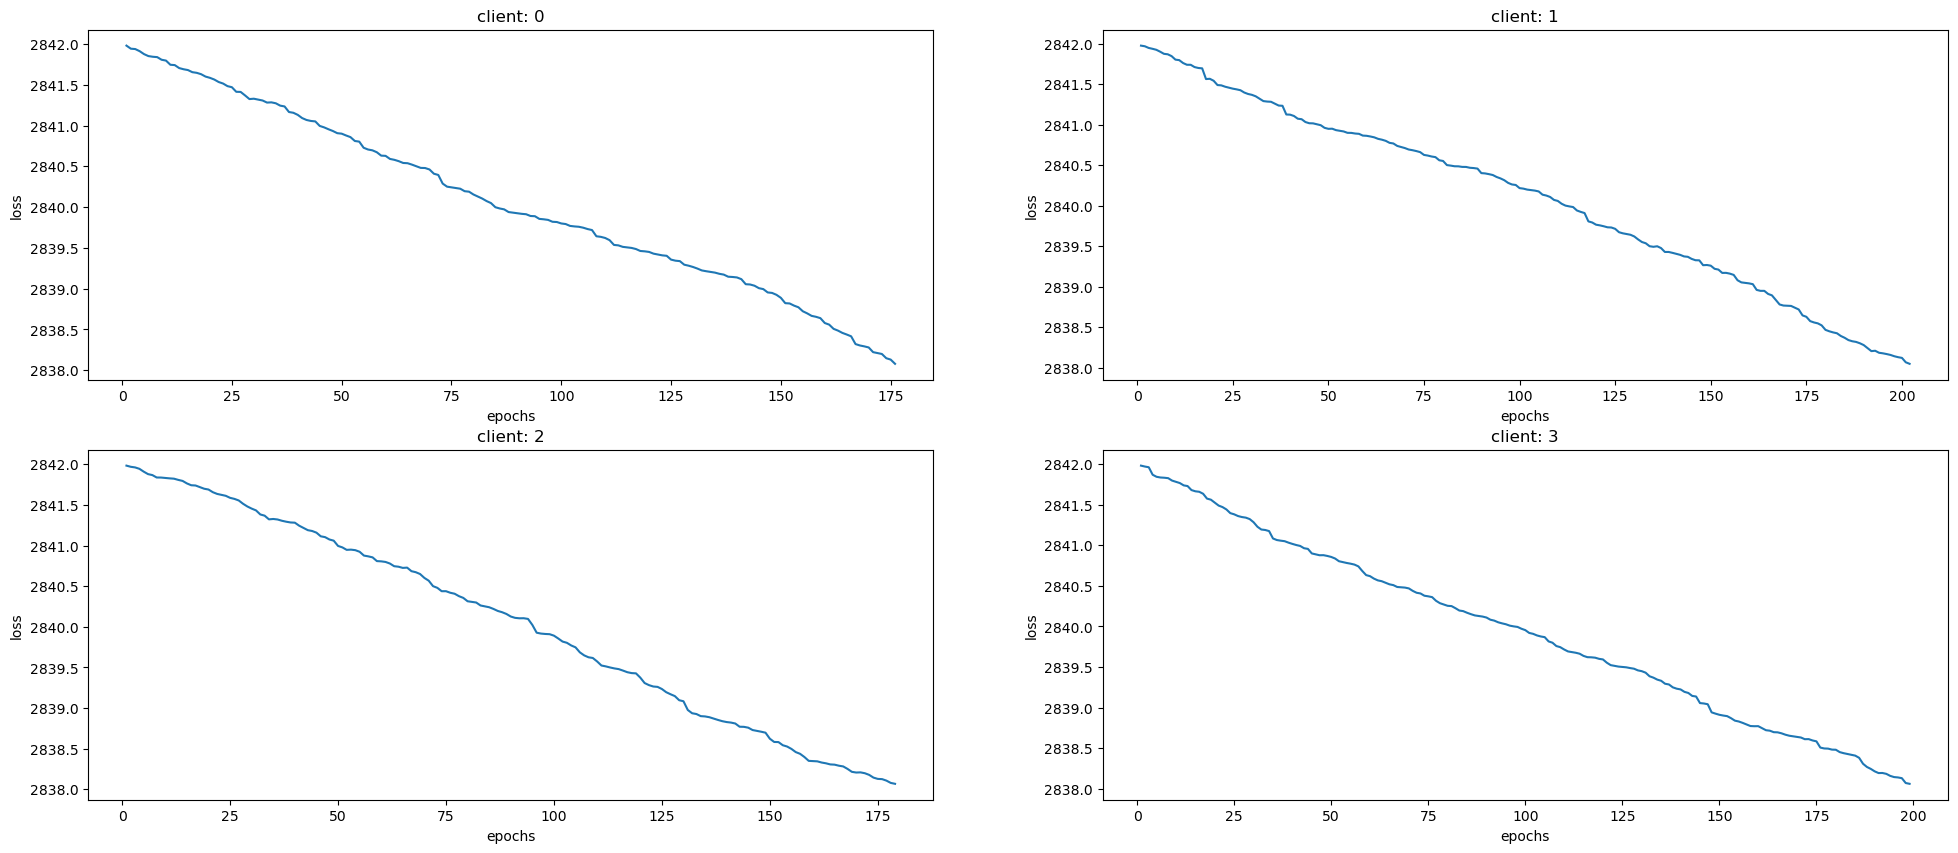

In [12]:
fig = plt.figure(figsize=(24, 10))
for i in range(min(num_clients, 4)):
    fig.add_subplot(2, int(min(num_clients, 4)/2), (i+1))
    X = global_trainer.client_trainer_set[i].loss_history
    Y = [i+1 for i in range(len(X))]
    plt.plot(Y, X)
    plt.title(f'client: {i}')
    plt.xlabel('epochs')
    plt.ylabel('loss')

## Test

In [13]:
client_evaluator_set = [ClientEvaluator(i, global_model, pre.client_test_sets[i]) for i in range(num_clients)]
global_evaluator = GlobalEvaluator(global_model, pre.global_test)

In [14]:
avg_client_acc = 0
avg_client_loss = 0
avg_client_conf_mat = torch.zeros([10, 10])  
  
for i in range(num_clients):
    client_evaluator_set[i].test()
    avg_client_acc += client_evaluator_set[i].accuracy
    avg_client_loss += client_evaluator_set[i].loss
    print(type(client_evaluator_set[i].conf_mat), type(avg_client_conf_mat))
    avg_client_conf_mat = torch.add(avg_client_conf_mat, client_evaluator_set[i].conf_mat)
    
avg_client_acc /= num_clients
avg_client_loss /= num_clients
avg_client_conf_mat  = torch.div(avg_client_conf_mat, num_clients)
    

client [0]: 100%|██████████| 40/40 [00:00<00:00, 270.49it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [1]: 100%|██████████| 40/40 [00:00<00:00, 418.72it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [2]: 100%|██████████| 40/40 [00:00<00:00, 415.94it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [3]: 100%|██████████| 40/40 [00:00<00:00, 348.91it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [4]: 100%|██████████| 40/40 [00:00<00:00, 403.21it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [5]: 100%|██████████| 40/40 [00:00<00:00, 412.16it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [6]: 100%|██████████| 40/40 [00:00<00:00, 356.38it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [7]: 100%|██████████| 40/40 [00:00<00:00, 361.29it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [8]: 100%|██████████| 40/40 [00:00<00:00, 240.48it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [9]: 100%|██████████| 40/40 [00:00<00:00, 284.58it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [10]: 100%|██████████| 40/40 [00:00<00:00, 362.80it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [11]: 100%|██████████| 40/40 [00:00<00:00, 306.48it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [12]: 100%|██████████| 40/40 [00:00<00:00, 359.69it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [13]: 100%|██████████| 40/40 [00:00<00:00, 370.73it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [14]: 100%|██████████| 40/40 [00:00<00:00, 328.44it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [15]: 100%|██████████| 40/40 [00:00<00:00, 349.94it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [16]: 100%|██████████| 40/40 [00:00<00:00, 300.64it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [17]: 100%|██████████| 40/40 [00:00<00:00, 360.77it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [18]: 100%|██████████| 40/40 [00:00<00:00, 393.09it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [19]: 100%|██████████| 40/40 [00:00<00:00, 395.71it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [20]: 100%|██████████| 40/40 [00:00<00:00, 385.30it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [21]: 100%|██████████| 40/40 [00:00<00:00, 346.98it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [22]: 100%|██████████| 40/40 [00:00<00:00, 379.46it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [23]: 100%|██████████| 40/40 [00:00<00:00, 399.91it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [24]: 100%|██████████| 40/40 [00:00<00:00, 344.89it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [25]: 100%|██████████| 40/40 [00:00<00:00, 309.65it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [26]: 100%|██████████| 40/40 [00:00<00:00, 378.89it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [27]: 100%|██████████| 40/40 [00:00<00:00, 349.04it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [28]: 100%|██████████| 40/40 [00:00<00:00, 359.48it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [29]: 100%|██████████| 40/40 [00:00<00:00, 349.88it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [30]: 100%|██████████| 40/40 [00:00<00:00, 354.16it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [31]: 100%|██████████| 40/40 [00:00<00:00, 358.63it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [32]: 100%|██████████| 40/40 [00:00<00:00, 343.30it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [33]: 100%|██████████| 40/40 [00:00<00:00, 375.03it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [34]: 100%|██████████| 40/40 [00:00<00:00, 318.07it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [35]: 100%|██████████| 40/40 [00:00<00:00, 376.57it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [36]: 100%|██████████| 40/40 [00:00<00:00, 366.18it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [37]: 100%|██████████| 40/40 [00:00<00:00, 339.71it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [38]: 100%|██████████| 40/40 [00:00<00:00, 345.57it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [39]: 100%|██████████| 40/40 [00:00<00:00, 344.98it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [40]: 100%|██████████| 40/40 [00:00<00:00, 373.77it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [41]: 100%|██████████| 40/40 [00:00<00:00, 382.11it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [42]: 100%|██████████| 40/40 [00:00<00:00, 298.12it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [43]: 100%|██████████| 40/40 [00:00<00:00, 339.99it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [44]: 100%|██████████| 40/40 [00:00<00:00, 357.47it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [45]: 100%|██████████| 40/40 [00:00<00:00, 361.89it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [46]: 100%|██████████| 40/40 [00:00<00:00, 361.11it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [47]: 100%|██████████| 40/40 [00:00<00:00, 342.32it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [48]: 100%|██████████| 40/40 [00:00<00:00, 343.98it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [49]: 100%|██████████| 40/40 [00:00<00:00, 356.27it/s]

<class 'torch.Tensor'> <class 'torch.Tensor'>


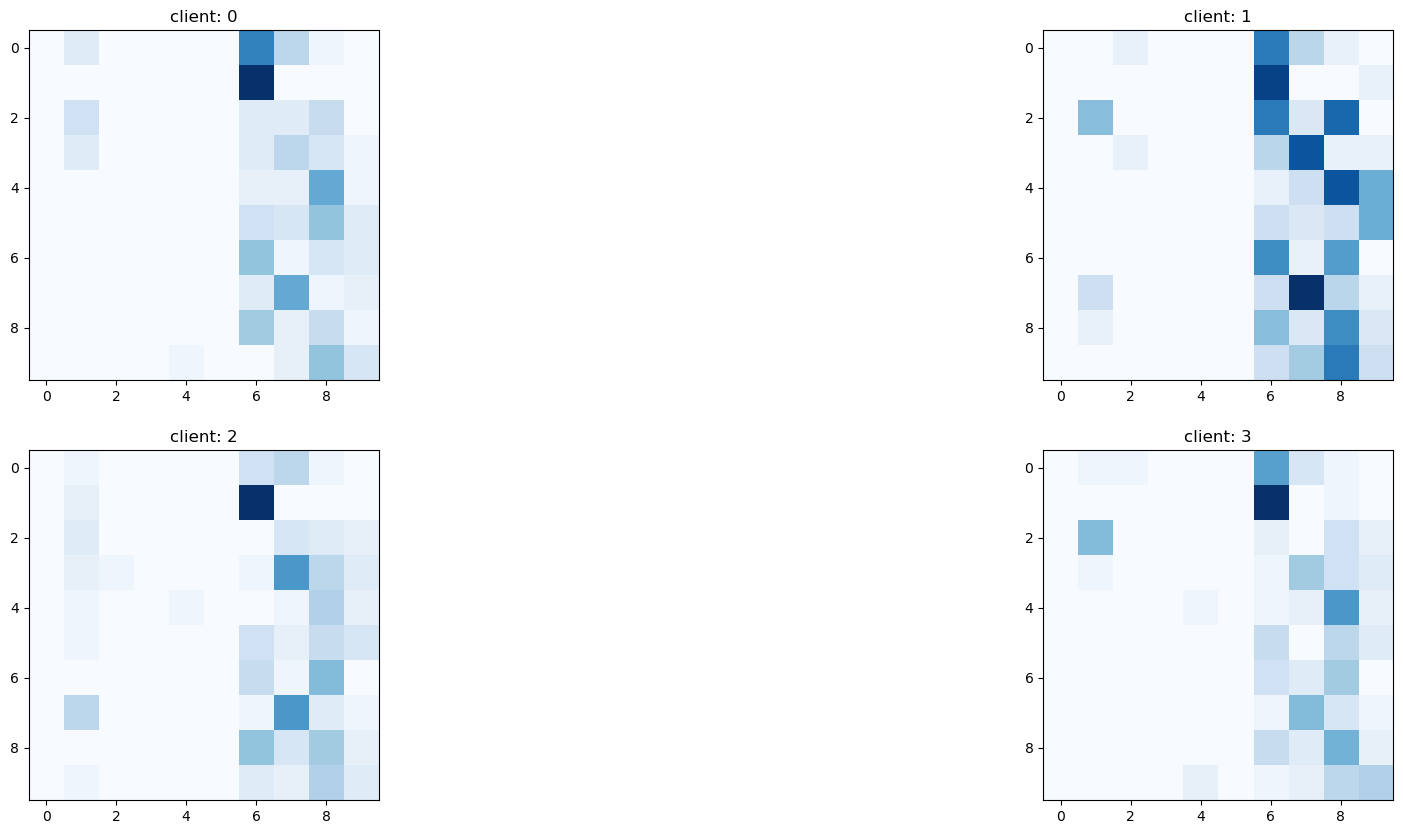

In [15]:
fig = plt.figure(figsize=(24, 10))
for i in range(min(num_clients, 4)):
    fig.add_subplot(2, int(min(num_clients, 4)/2), (i+1))
    plt.imshow(client_evaluator_set[i].conf_mat, cmap='Blues')
    plt.title(f'client: {i}')

In [16]:
global_evaluator.test()

global_evaluation: 100%|██████████| 2000/2000 [00:05<00:00, 372.90it/s]


Text(0.5, 1.0, 'client average')

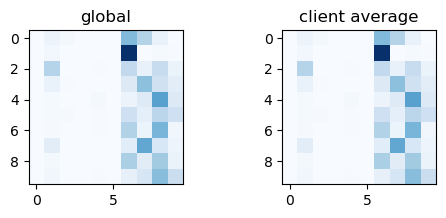

In [17]:
fig = plt.figure(figsize=(6, 2))
fig.add_subplot(1, 2, 1)
plt.imshow(global_evaluator.conf_mat, cmap='Blues')
plt.title('global')
fig.add_subplot(1, 2, 2)
plt.imshow(avg_client_conf_mat, cmap='Blues')
plt.title('client average')

In [18]:
print('Global Accuracy', global_evaluator.accuracy, '\tClient avg Accuracy', avg_client_acc)
print('Global Loss' , global_evaluator.loss, '\tClient avg Loss', avg_client_loss)

Global Accuracy 0.16049999999999753 	Client avg Accuracy 0.16050000000000011
Global Loss 2.29626971809078 	Client avg Loss 2.2962697181901612
